## NPV EXAM SET - 1

# PART - A

### 4 QUESTIONS EACH CARRY 2 MARKS (4*2=8)

In [4]:
import numpy as np

1. Create a 2d-array or matrix of order 3x3 with values = 1,2,3,4,5,6,7,8,9 arranged in the same order.

**Solution**

In [5]:
a = np.matrix('1,2,3;4,5,6;7,8,9')
a

matrix([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

-----------

2. Find the mean of all elements in the given matrix nd6. 

**nd6:**

   **[[ 1   4  9 121 144 169]**
 
   **[ 16 25 36 196 225 256]** 
      
   **[ 49 64 81 289 324 361]]**

**Solution**

In [7]:
 nd6 = np.matrix('1,4,9,121,144,169;16,25,36,196,225,256;49,64,81,289,324,361')
nd6.mean()

131.66666666666666

---------

3. Find the dot product of two given matrices.

**a:**   
**[[1,2]**
 
 **[3,4]]**

**b:** 

**[[4,5]**
  
 **[6,7]]**

**Solution**

In [8]:
a = np.matrix('1,2;3,4')
b = np.matrix('4,5;6,7')

In [9]:
np.dot(a,b)

matrix([[16, 19],
        [36, 43]])

----------

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
mtcars=pd.read_csv('mtcars_internal.csv')


4. What is the highest difference between the hp and cyl?

In [15]:
max(mtcars['hp'] - mtcars['cyl'] )

327

# PART - B 

### 5 QUESTIONS EACH CARRY 3 MARKS(5*3 = 15 Marks)

5.Calculate the Inter-Quartile Range(IQR) for `mpg` in the given dataset.

In [17]:
mtcars['mpg'].quantile(0.75) - mtcars['mpg'].quantile(0.25)

7.375

-------------------------

6.Generate suitable graphs for comparing suicides between men and women for the top 5 countries with the highest suicide rate per 100,000.

In [20]:
df=pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [22]:
sd_per_100 = pd.Series()
for i in df['country'].unique():
    sd_per_100[i] = df.loc[df['country'] == i]['suicides/100k pop'].sum()
top5_100 = sd_per_100.sort_values(ascending=False)[:5]
top5_100

Russian Federation    11305.13
Lithuania             10588.88
Hungary               10156.07
Kazakhstan             9519.52
Republic of Korea      9350.45
dtype: float64

In [23]:
total_by_gender = pd.DataFrame(columns = ['Suicides_Male', 'Suicides_Female'])
total_by_gender 

,Suicides_Male,Suicides_Female


In [24]:
for i in top5_100.index:
    total_by_gender.loc[i] = (df.loc[(df['country'] == i) & (df['sex'] == 'male')]['suicides_no'].sum(),
                              df.loc[(df['country'] == i) & (df['sex'] == 'female')]['suicides_no'].sum())

In [25]:
total_by_gender

,Suicides_Male,Suicides_Female
Russian Federation,995412,214330
Lithuania,23028,5011
Hungary,55776,18115
Kazakhstan,83386,18160
Republic of Korea,179115,82615


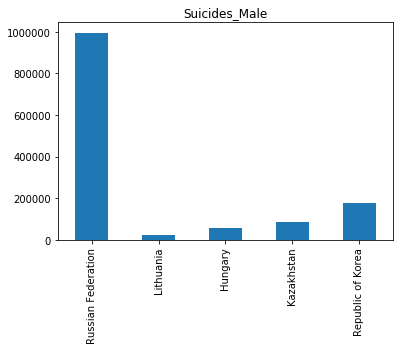

In [28]:
total_by_gender['Suicides_Male'].plot(kind='bar', title = 'Suicides_Male')

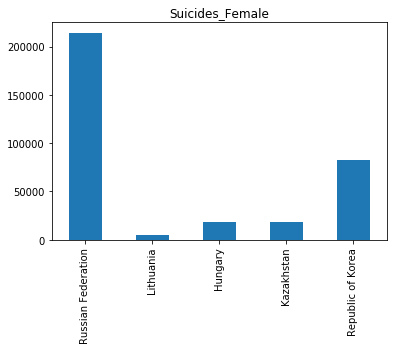

In [29]:
total_by_gender['Suicides_Female'].plot(kind='bar', title = 'Suicides_Female')

--------------------

7. Please obtain the distribution of suicides for each age group for Argentina. Plot these as graphs

In [30]:
sd_argentina = df.loc[df['country'] == 'Argentina'].reset_index()

In [31]:
plot_df = pd.DataFrame(columns = ['Males', 'Females'])
for i in sd_argentina['age'].unique():
    plot_df.loc[i] = (sd_argentina.loc[(df['age'] == i) & (df['sex'] == 'male')]['suicides_no'].sum(),
                      sd_argentina.loc[(df['age'] == i) & (df['sex'] == 'female')]['suicides_no'].sum())   

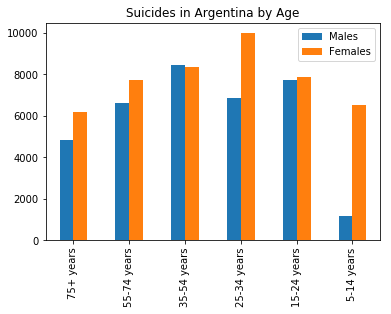

In [32]:
plot_df.plot(kind = 'bar', title='Suicides in Argentina by Age')

------------

8. Generate a correlation heatmap for the dataset. Which pairs of variables are highly correlated.

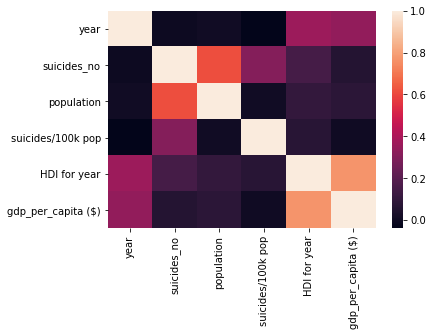

In [33]:
import seaborn as sns
sns.heatmap(df.corr())

In [34]:
df.corr()[df.corr()>0.5]

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.0,NaN,NaN,NaN,NaN,NaN
suicides_no,NaN,1.000000,0.616162,NaN,NaN,NaN
population,NaN,0.616162,1.000000,NaN,NaN,NaN
suicides/100k pop,NaN,NaN,NaN,1.0,NaN,NaN
HDI for year,NaN,NaN,NaN,NaN,1.000000,0.771228
gdp_per_capita ($),NaN,NaN,NaN,NaN,0.771228,1.000000


The variable 'suicides_no' is highly correlated with 'population' The variable 'gdp_per_capita ($)' is highly correlated with 'HD for year'



---------------

9.Are there any countries with no suicides recorded?  Create a new data frame which ranks these countries by HDI.

In [35]:
suicides = pd.Series()
for i in df.country.unique():
    suicides[i] = df.loc[df['country'] == i]['suicides_no'].sum()

In [36]:
suicides[suicides == suicides.min()]

Dominica                 0
Saint Kitts and Nevis    0
dtype: int64

this are the countries with no suicides

--------------

# PART-C

10.Generate the following tables:

(a).A table containing the columns ‘Country’, ‘Year’, ‘Total suicides’. Total Suicides has to be calculated from the existing table.(3 marks)

(b).A Table containing the columns ‘Country’, ‘Year’, ‘per capita gdp’.As per the sum of there 'per capita GDP'(2 marks)

(c).Merge the above two tables using ‘Country’ as the merge column.(2 marks)


a) A table containing the columns ‘Country’, ‘Year’, ‘Total suicides’. Total Suicides has to be calculated from the existing table.(3 marks)

In [42]:
df_a = df[['country', 'year', 'suicides_no']]

In [43]:
output_a = df_a.groupby(['country','year']).sum()
output_a

suicides_no
country             year             
Albania             1987           73
                    1988           63
                    1989           68
                    1992           47
                    1993           73
                    1994           50
                    1995           88
                    1996           89
                    1997          170
                    1998          154
                    1999          139
                    2000           54
                    2001          119
                    2002          133
                    2003          124
                    2004          146
                    2005            0
                    2006            0
                    2007          124
                    2008          160
                    2009            0
                    2010           96
Antigua and Barbuda 1985            0
                    1986            0
                    1987            0
                    1988            0
                    1989            0
                    1990            1
                    1991            0
                    1992            0
...                               ...
Uruguay             2007          576
                    2008          523
                    2009          511
                    2010          547
                    2012          599
                    2013          546
                    2014          591
                    2015          630
Uzbekistan          1990         1459
                    1991         1393
                    1992         1344
                    1993         1355
                    1994         1419
                    1995         1485
                    1996         1699
                    1997         1554
                    1998         1620
                    1999         1795
                    2000         1919
                    2001         1914
                    2002         1576
                    2003         1416
                    2004         1251
                    2005         1221
                    2009         1399
                    2010         1464
                    2011         1640
                    2012         1835
                    2013         1950
                    2014         2095

[2321 rows x 1 columns]


b) A Table containing the columns ‘Country’, ‘Year’, ‘per capita gdp’.(2 marks)

In [44]:
df_b = df[['country', 'year', 'gdp_per_capita ($)']]

In [45]:
output_b = df_b.groupby(['country','year']).sum()
output_b

gdp_per_capita ($)
country             year                    
Albania             1987                9552
                    1988                9228
                    1989                9996
                    1992                3012
                    1993                5244
                    1994                8364
                    1995               10020
                    1996               13524
                    1997                9516
                    1998               10788
                    1999               13524
                    2000               15588
                    2001               17412
                    2002               18876
                    2003               24252
                    2004               30528
                    2005               35172
                    2006               38820
                    2007               46356
                    2008               56064
                    2009               52644
                    2010               52308
Antigua and Barbuda 1985               46200
                    1986               56880
                    1987               67140
                    1988               80316
                    1989               88884
                    1990               92928
                    1991               95712
                    1992               97044
...                                      ...
Uruguay             2007               90972
                    2008              117516
                    2009              121992
                    2010              154584
                    2012              195168
                    2013              218148
                    2014              216144
                    2015              200352
Uzbekistan          1990                9336
                    1991                9456
                    1992                8508
                    1993                8496
                    1994                8088
                    1995                8172
                    1996                8436
                    1997                8688
                    1998                8628
                    1999                9612
                    2000                7584
                    2001                6156
                    2002                5136
                    2003                5292
                    2004                6192
                    2005                7272
                    2009               15984
                    2010               18396
                    2011               21204
                    2012               23568
                    2013               25800
                    2014               27708

[2321 rows x 1 columns]

-----------------------


c) Merge the above two tables using ‘Country’ as the merge column.(2 marks)

In [47]:
pd.merge(df_a,df_b, on='country')

,country,year_x,suicides_no,year_y,gdp_per_capita ($)
0,Albania,1987,21,1987,796
1,Albania,1987,21,1987,796
2,Albania,1987,21,1987,796
3,Albania,1987,21,1987,796
4,Albania,1987,21,1987,796
5,Albania,1987,21,1987,796
6,Albania,1987,21,1987,796
7,Albania,1987,21,1987,796
8,Albania,1987,21,1987,796
9,Albania,1987,21,1987,796


# ------------------------------    ALL THE BEST -------------------------------